<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Build/blob/master/SteamDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What makes a game successful on Steam?
We are going to be taking some metrics for games that are played as their success. My scratch notebook is listed here for the sake of completeness, however, I am going to be presenting this notebook for the final walk-through since it is much more 'on point'.

https://github.com/RobDBennett/DS-Unit-1-Build/blob/master/SteamDataShaping.ipynb

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import files
uploaded = files.upload()

Saving steam-200k.csv to steam-200k.csv


In [0]:
column_headers= ['id','game','purchase','hours','0']
games = pd.read_csv('steam-200k.csv', header=None,names=column_headers)
print(games.shape)
games = games.drop(['0'], axis=1)

(200000, 5)


In [0]:
uploaded= files.upload()

Saving steam.csv to steam.csv


In [0]:
steam = pd.read_csv('steam.csv')
print(steam.shape)
steam.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [0]:
steam = steam.drop(['english','developer','publisher','platforms','required_age',
                    'categories','steamspy_tags','achievements','owners',
                    'appid','average_playtime','median_playtime'],axis=1)
steam.head()

,name,release_date,genres,positive_ratings,negative_ratings,price
0,Counter-Strike,2000-11-01,Action,124534,3339,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,3.99


In [0]:
steam = steam.rename(columns={'name':'game','release_date':'release','genres':'genre','positive_ratings':'pos_rate','negative_ratings':'neg_rate','price':'price'})
steam.head()

,game,release,genre,pos_rate,neg_rate,price
0,Counter-Strike,2000-11-01,Action,124534,3339,7.19
1,Team Fortress Classic,1999-04-01,Action,3318,633,3.99
2,Day of Defeat,2003-05-01,Action,3416,398,3.99
3,Deathmatch Classic,2001-06-01,Action,1273,267,3.99
4,Half-Life: Opposing Force,1999-11-01,Action,5250,288,3.99


In [0]:
steam = steam.replace('Counter-Strike: Global Offensive', 'Counter-Strike Global Offensive')
steam = steam.replace('Counter-Strike: Source', 'Counter-Strike Source')
steam = steam.replace('The Elder Scrolls V: Skyrim', 'The Elder Scrolls V Skyrim')
steam = steam.replace('Half-Life 2: Lost Coast', 'Half-Life 2 Lost Coast')
steam = steam.replace("Sid Meier's Civilization® V", "Sid Meier's Civilization V")
steam = steam.replace('Half-Life 2: Deathmatch', 'Half-Life 2 Deathmatch')
steam = steam.replace('Counter-Strike: Condition Zero', 'Counter-Strike Condition Zero')
steam = steam.replace('Call of Duty®: Modern Warfare® 2', 'Call of Duty Modern Warfare 2')
steam = steam.replace('Fallout: New Vegas', 'Fallout New Vegas')

In [0]:
new = pd.merge(games, steam, on='game',how='inner')
print(new.shape)
new.head()

(104256, 9)


,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
1,151603712,The Elder Scrolls V Skyrim,play,273.0,2011-11-10,RPG,237303,14951,9.99
2,59945701,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99
3,59945701,The Elder Scrolls V Skyrim,play,58.0,2011-11-10,RPG,237303,14951,9.99
4,53875128,The Elder Scrolls V Skyrim,purchase,1.0,2011-11-10,RPG,237303,14951,9.99


In [0]:
played = new.replace('purchase', np.nan)
played = played.dropna()
played['game'].value_counts().head(10)

Dota 2                             4841
Team Fortress 2                    2323
Counter-Strike Global Offensive    1377
Unturned                           1069
Left 4 Dead 2                       801
Counter-Strike Source               715
The Elder Scrolls V Skyrim          677
Garry's Mod                         666
Counter-Strike                      568
Sid Meier's Civilization V          554
Name: game, dtype: int64

In [0]:
played['counter'] = 1
played.head()

,id,game,purchase,hours,release,genre,pos_rate,neg_rate,price,counter
1,151603712,The Elder Scrolls V Skyrim,play,273.0,2011-11-10,RPG,237303,14951,9.99,1
3,59945701,The Elder Scrolls V Skyrim,play,58.0,2011-11-10,RPG,237303,14951,9.99,1
6,92107940,The Elder Scrolls V Skyrim,play,110.0,2011-11-10,RPG,237303,14951,9.99,1
8,250006052,The Elder Scrolls V Skyrim,play,465.0,2011-11-10,RPG,237303,14951,9.99,1
10,11373749,The Elder Scrolls V Skyrim,play,220.0,2011-11-10,RPG,237303,14951,9.99,1


In [0]:
titles = ["Dota 2", "Team Fortress 2", "Counter-Strike Global Offensive", "Unturned",
          "Left 4 Dead 2", "Counter-Strike Source", "The Elder Scrolls V Skyrim",
          "Garry's Mod", "Counter-Strike", "Sid Meier's Civilization V"]
#players = np.empty(shape=(10,1), dtype='int')
#mean = np.empty(shape=(10,1), dtype='int')
#median = np.empty(shape=(10,1), dtype='int')
players = []
mean = []
median = []

In [0]:
def testdata(title):
  scratch = played.loc[played['game'] == title]
  pl = scratch['counter'].sum()
  me = scratch['hours'].mean()
  md = scratch['hours'].median()
  me = round(me, 2)
  md = round(md, 2)
  players.append(pl)
  mean.append(me)
  median.append(md)


In [0]:
for title in titles:
  testdata(title)
print(players)
print(mean)
print(median)

[4841, 2323, 1377, 1069, 801, 715, 677, 666, 568, 554]
[202.79, 74.76, 234.4, 15.06, 41.94, 134.37, 104.71, 74.66, 236.38, 180.18]
[5.5, 4.4, 61.0, 3.5, 10.5, 13.8, 47.0, 17.25, 8.8, 37.0]


In [0]:
data = {'game': titles}
final10 = pd.DataFrame(data=data, columns=['game'])
final10['players'] = players
final10['mean']= mean
final10['median']=median
final10

,game,players,mean,median
0,Dota 2,4841,202.79,5.50
1,Team Fortress 2,2323,74.76,4.40
2,Counter-Strike Global Offensive,1377,234.40,61.00
3,Unturned,1069,15.06,3.50
4,Left 4 Dead 2,801,41.94,10.50
5,Counter-Strike Source,715,134.37,13.80
6,The Elder Scrolls V Skyrim,677,104.71,47.00
7,Garry's Mod,666,74.66,17.25
8,Counter-Strike,568,236.38,8.80
9,Sid Meier's Civilization V,554,180.18,37.00


In [0]:
final10 = pd.merge(final10, played.drop(['id','purchase','hours','counter'], axis=1), 
                  on='game',how='left')
final10 = final10.drop_duplicates()
final10

,game,players,mean,median,release,genre,pos_rate,neg_rate,price
0,Dota 2,4841,202.79,5.50,2013-07-09,Action;Free to Play;Strategy,863507,142079,0.00
4841,Team Fortress 2,2323,74.76,4.40,2007-10-10,Action;Free to Play,515879,34036,0.00
7164,Counter-Strike Global Offensive,1377,234.40,61.00,2012-08-21,Action;Free to Play,2644404,402313,0.00
8541,Unturned,1069,15.06,3.50,2017-07-07,Action;Adventure;Casual;Free to Play;Indie,292574,31482,0.00
9610,Left 4 Dead 2,801,41.94,10.50,2009-11-19,Action,251789,8418,7.19
10411,Counter-Strike Source,715,134.37,13.80,2004-11-01,Action,76640,3497,7.19
11126,The Elder Scrolls V Skyrim,677,104.71,47.00,2011-11-10,RPG,237303,14951,9.99
11803,Garry's Mod,666,74.66,17.25,2006-11-29,Indie;Simulation,363721,16433,6.99
12469,Counter-Strike,568,236.38,8.80,2000-11-01,Action,124534,3339,7.19
13037,Sid Meier's Civilization V,554,180.18,37.00,2010-09-23,Strategy,129030,5565,19.99


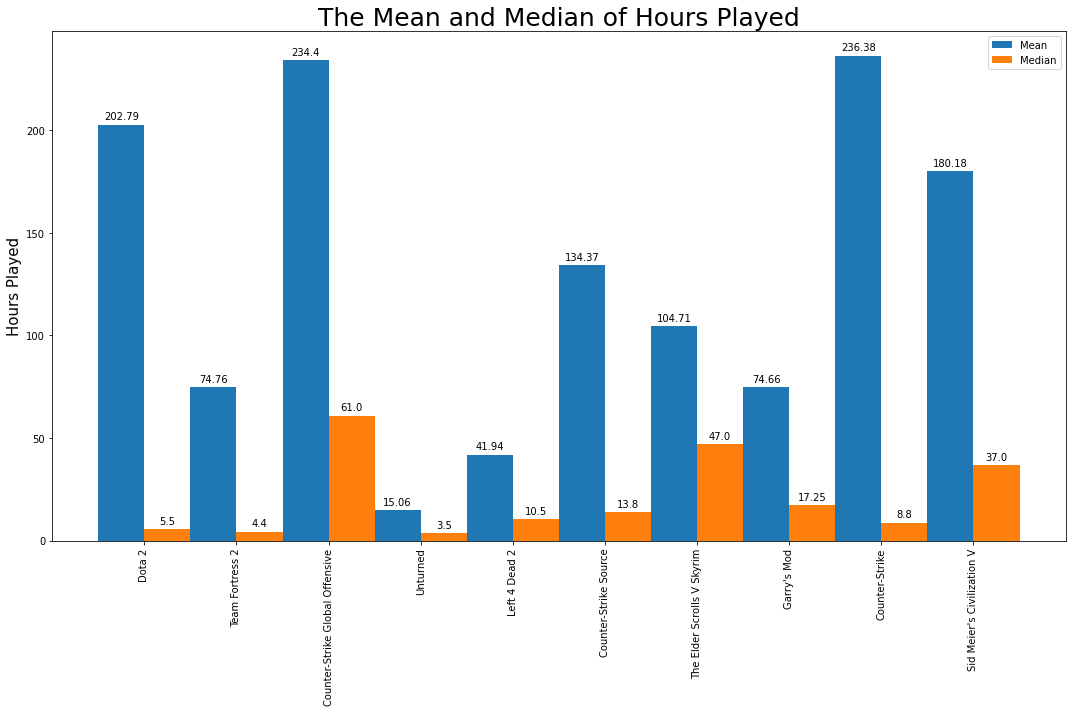

In [0]:
labels = list(final10['game'])
means = list(final10['mean'])
median = list(final10['median'])
x = np.arange(len(labels))
width = 0.5 
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, median, width, label='Median')
ax.set_ylabel('Hours Played', fontsize=15)
ax.set_title('The Mean and Median of Hours Played', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

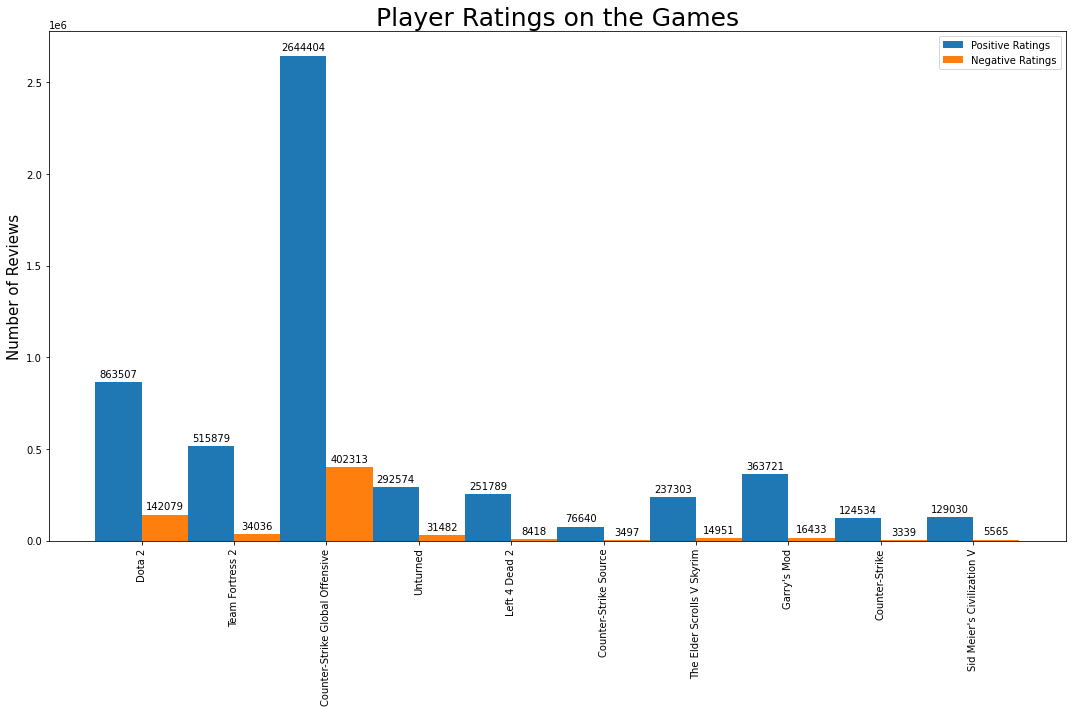

In [0]:
pos = list(final10['pos_rate'])
neg = list(final10['neg_rate'])
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, pos, width, label='Positive Ratings')
rects2 = ax.bar(x + width/2, neg, width, label='Negative Ratings')

ax.set_ylabel('Number of Reviews', fontsize=15)
ax.set_title('Player Ratings on the Games', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [0]:
purchased = new.replace('play', np.nan)
purchased = purchased.dropna()
bought = purchased['game'].value_counts().head(10)
bought

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Counter-Strike Source               978
Left 4 Dead 2                       951
Counter-Strike                      856
Warframe                            847
Half-Life 2 Deathmatch              823
Name: game, dtype: int64